In [1]:
import torch
from easy_transformer import EasyTransformer

#device = 'cuda' if torch.cuda.is_available() else 'cpu'
device = 'cpu'
print(f"Using {device} device")
torch.set_grad_enabled(False)

model = EasyTransformer.from_pretrained('gpt2').to(device)

# Convenience function for decoding token
decode = model.tokenizer.decode

# Convenience function for encoding token
def encode(t):
    global model
    result = model.tokenizer.encode(t)
    if len(result) != 1:
        raise Exception(f"Not a single token: {t}")
    return result[0]

unembed = model.unembed.W_U.data
embed = model.embed.W_E.data
d_M = model.cfg.d_model
d_V = model.cfg.d_vocab

unembed_norm = torch.nn.functional.normalize(unembed, dim=0)

Using cpu device
Loading model: gpt2


/home/giles/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:83: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0
Using pad_token, but it is not set yet.


Moving model to device:  cpu
Finished loading pretrained model gpt2 into EasyTransformer!
Moving model to device:  cpu


In [38]:
import matplotlib.pyplot as plt
import random
from sklearn.manifold import TSNE

num = 100
random.seed(12345)

start_tok = ' cat'
start_t = encode(start_tok)
start_v = unembed_norm[:,start_t]

similarities = torch.matmul(start_v, unembed_norm)
values = [(v.item(), t) for t,v in enumerate(similarities)]
values.sort(reverse=True)

ts = torch.tensor([t for v,t in values[:num]])
vs = unembed_norm[:,ts]

xy = TSNE(2, perplexity=3, verbose=2, init='pca', learning_rate='auto').fit_transform(vs.T)

[t-SNE] Computing 10 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 0.181142
[t-SNE] Computed conditional probabilities in 0.002s
[t-SNE] Iteration 50: error = 80.5061417, gradient norm = 0.7877024 (50 iterations in 0.116s)
[t-SNE] Iteration 100: error = 79.4860535, gradient norm = 0.8107281 (50 iterations in 0.015s)
[t-SNE] Iteration 150: error = 76.0458527, gradient norm = 0.8695593 (50 iterations in 0.015s)
[t-SNE] Iteration 200: error = 75.8324738, gradient norm = 0.9291499 (50 iterations in 0.016s)


/home/giles/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] Iteration 250: error = 76.1386337, gradient norm = 0.8676181 (50 iterations in 0.016s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.138634
[t-SNE] Iteration 300: error = 1.5349436, gradient norm = 0.0151583 (50 iterations in 0.014s)
[t-SNE] Iteration 350: error = 1.1177244, gradient norm = 0.0051226 (50 iterations in 0.015s)
[t-SNE] Iteration 400: error = 0.9686913, gradient norm = 0.0151502 (50 iterations in 0.014s)
[t-SNE] Iteration 450: error = 0.9066044, gradient norm = 0.0080210 (50 iterations in 0.014s)
[t-SNE] Iteration 500: error = 0.8855073, gradient norm = 0.0015855 (50 iterations in 0.014s)
[t-SNE] Iteration 550: error = 0.8627084, gradient norm = 0.0017123 (50 iterations in 0.014s)
[t-SNE] Iteration 600: error = 0.8537110, gradient norm = 0.0013304 (50 iterations in 0.014s)
[t-SNE] Iteration 650: error = 0.8491032, gradient norm = 0.0007724 (50 iterations in 0.014s)
[t-SNE] Iteration 700: error = 0.8467453, gradient norm = 0.0011228 (50 ite

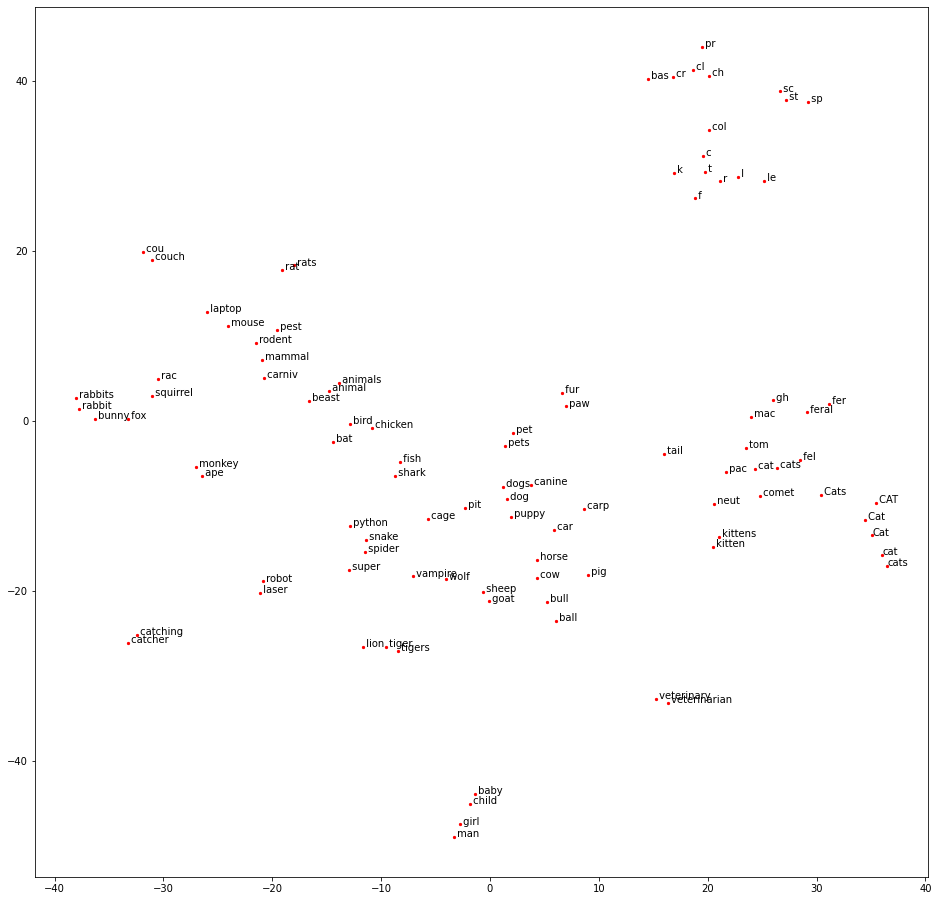

In [40]:
plt.rcParams['figure.figsize'] = [16, 16]

plt.scatter(xy[:,0], xy[:,1], s=5, color='r')
for i in range(num):
    plt.text(xy[i,0], xy[i,1], decode(ts[i]), parse_math=False)

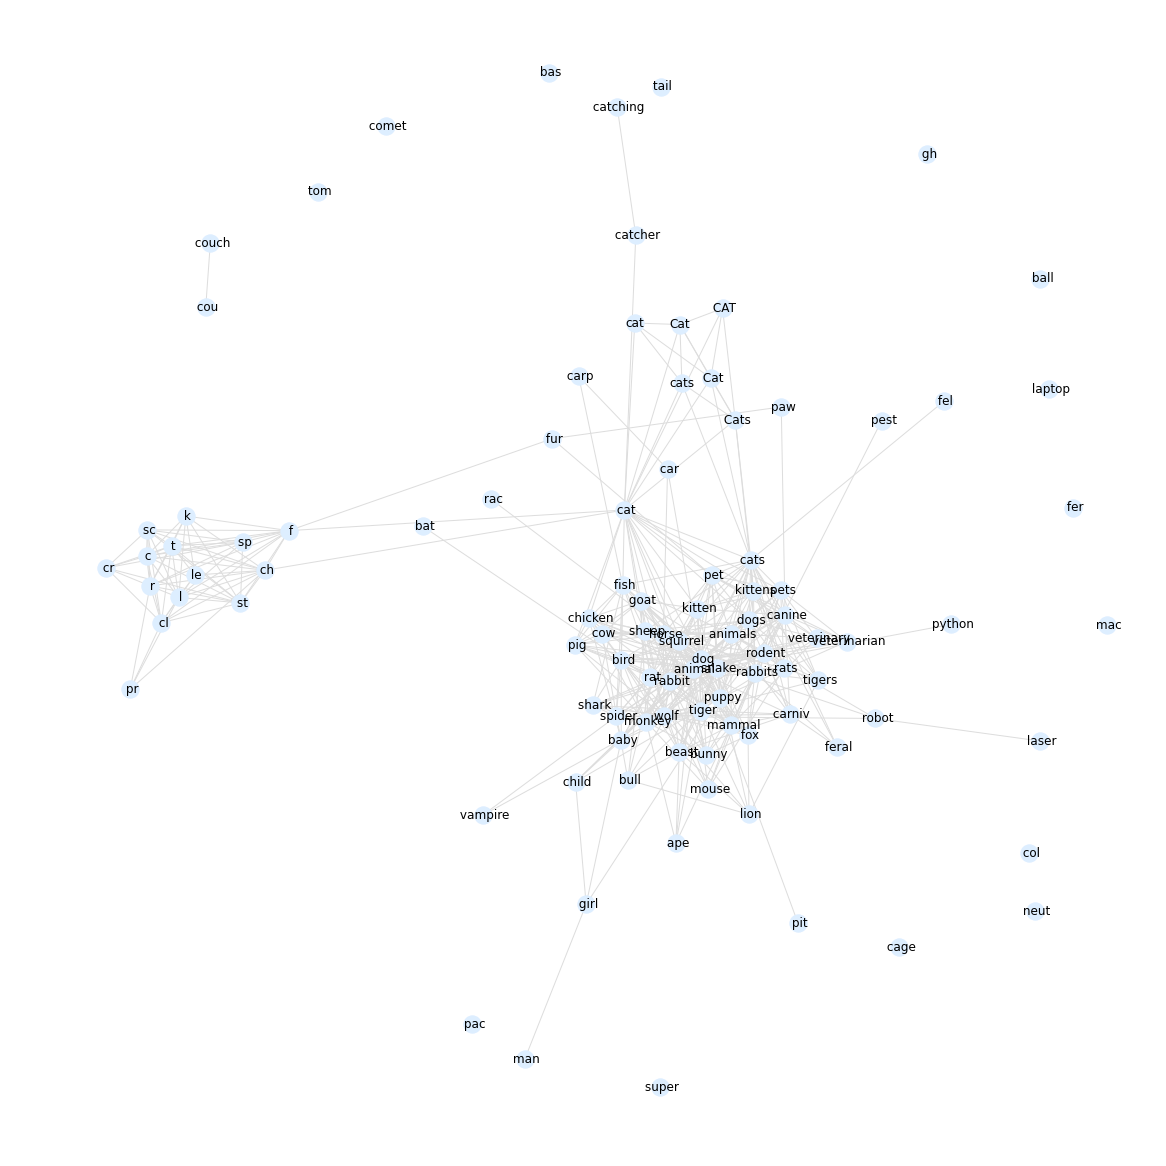

In [66]:
import networkx as nx

threshold = 0.3

G = nx.Graph()
toks = []
for i in range(num):
    toks.append(decode(ts[i]))
    G.add_node(toks[-1])
    
adj = torch.matmul(vs.T, vs)
for i in range(num):
    for j in range(i + 1, num):
        if adj[i,j] >= threshold:
            G.add_edge(toks[i], toks[j], weight=adj[i,j] / 20)

nx.draw_spring(G, with_labels=True, node_color='#ddeeff', edge_color='#dddddd')

/home/giles/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/giles/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/giles/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39764 (\N{CJK UNIFIED IDEOGRAPH-9B54}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/giles/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12457 (\N{KATAKANA LETTER SMALL O}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/giles/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12488 (\N{KATAKANA LETTER TO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/giles/.loca

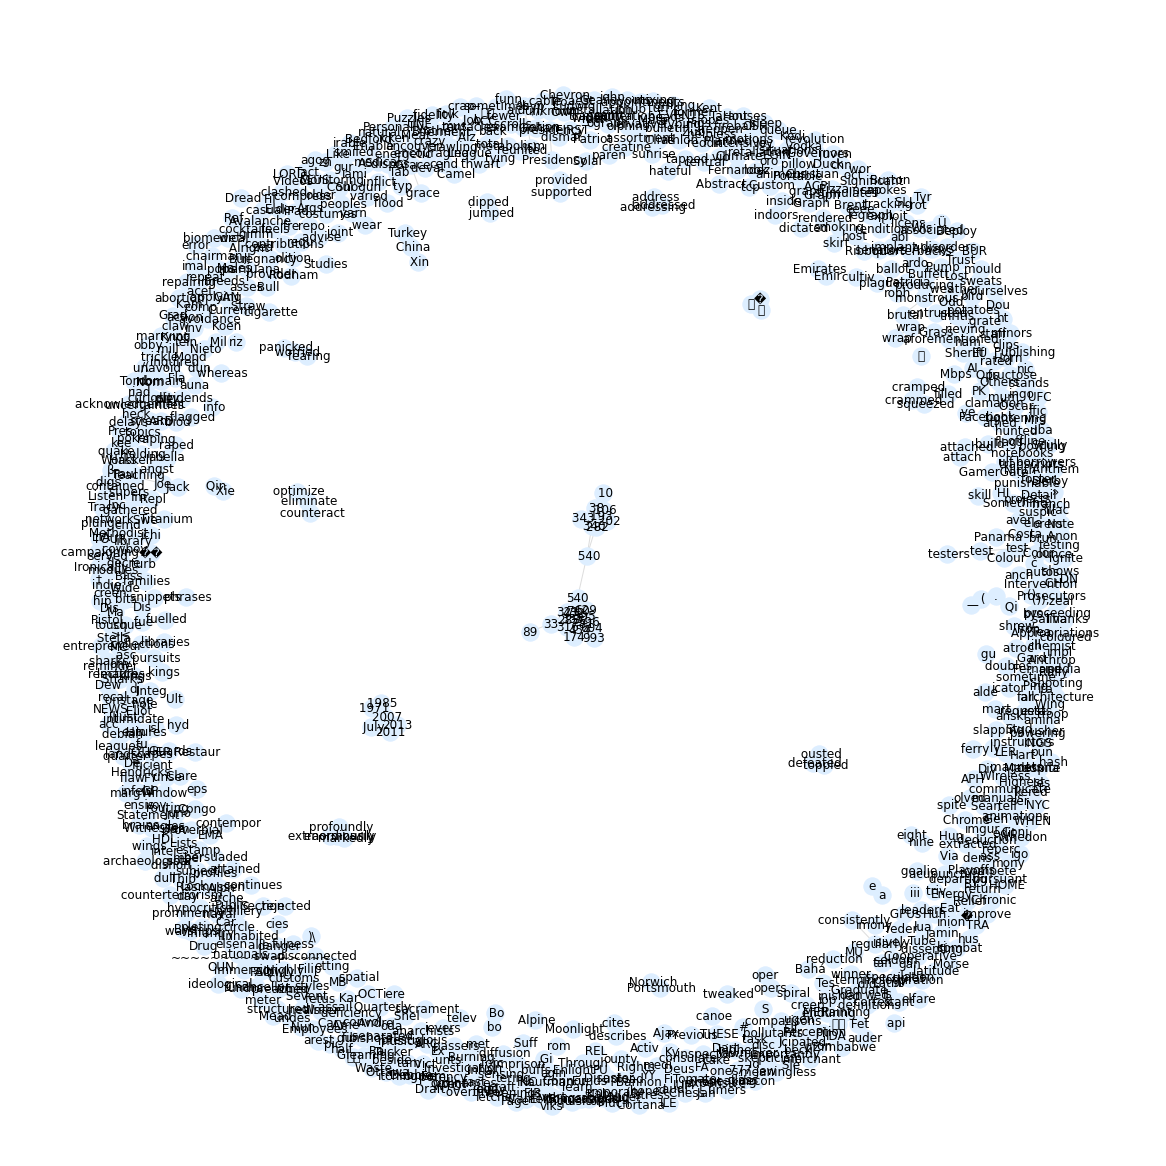

In [85]:
threshold = 0.4
num = 1000

G = nx.Graph()
ts = torch.tensor(random.sample(range(d_V), k=num))
toks = []
for i in range(num):
    toks.append(decode(ts[i]))
    G.add_node(toks[-1])

vs = unembed_norm[:,ts]
adj = torch.matmul(vs.T, vs)
for i in range(num):
    for j in range(i + 1, num):
        if adj[i,j] >= threshold:
            G.add_edge(toks[i], toks[j], weight=0.1)

nx.draw_spring(G, with_labels=True, node_color='#ddeeff', edge_color='#dddddd')